In [117]:
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
import os
import glob
import pandas as pd
from BESSSim.SimpleBESS import SimpleBEES

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Metrics Analysis

## Functions

In [1]:
cidades = ["aracaju", "joaopessoa", "maceio", "natal", "recife", "salvador", "saoluis", "teresina", "fortaleza"]

def create_Metrics_dataframe(cidades):

    dict_metrics_list = []

    for cidade in cidades:
        # Using readlines()
        #print(cidade)
        list_of_files = glob.glob("./cidades/{0}/AutoMLResults/results_*.txt".format(cidade)) # * means all if need specific format then *.csv
        last_result_file = os.path.basename(max(list_of_files, key=os.path.getctime))
        #print(last_result_file)
        results_file = open("./cidades/{0}/AutoMLResults/{1}".format(cidade, last_result_file), 'r')
        result_Lines = results_file.readlines()
        
        count = 0
        # Strips the newline character
        for line in result_Lines:
            count += 1
            lineContent = line.strip()
            #print("Line{}: {}".format(count, lineContent))
            if "Scores" not in lineContent:
                dict_metrics = {"city":"", "metric":"", "value":"", "automl":""}
                metric=lineContent[lineContent.find("-")+1:lineContent.find(":")].strip()
                value=float(lineContent[lineContent.find(":")+1:].strip())
                automl=lineContent[:lineContent.find("-")-1].strip()
                if metric != "MAPE":
                    dict_metrics["city"]=cidade
                    dict_metrics["metric"]=metric
                    dict_metrics["value"]=value
                    dict_metrics["automl"]=automl
                    dict_metrics_list.append(dict_metrics)

    df = pd.DataFrame(dict_metrics_list)
    df.replace("joaopessoa", "João Pessoa", inplace=True)
    df.replace("saoluis", "São Luis", inplace=True)
    df.replace("maceio", "Maceió", inplace=True)
    df.city = df.city.apply(lambda x: x.capitalize())

    return df

def countWinners(dataFrame):
    ACOCLSTM_wins = []
    ACOLSTM_wins = []
    AUTOKERAS_wins = []
    AGMMFF_wins = []
    TPOT_wins = []
    HPSKLEARN_wins = []
    for metric in dataFrame.metric.unique():
        for city in dataFrame.city.unique():
            #print(df_metrics[(df_metrics["metric"]==metric) & (df_metrics["city"]==city)].sort_values(by="value", ascending=True))
            winner = df_metrics[(df_metrics["metric"]==metric) & (df_metrics["city"]==city)].sort_values(by="value", ascending=True).automl.values[0]
            if winner == "ACOLSTM":
                ACOLSTM_wins.append(city+" - "+metric)
            elif winner == "ACOCLSTM":
                ACOLSTM_wins.append(city+" - "+metric)
            elif winner == "AGMMFF":
                AGMMFF_wins.append(city+" - "+metric)
            elif winner == "TPOT":
                TPOT_wins.append(city+" - "+metric)
            elif winner == "HPSKLEARN":
                HPSKLEARN_wins.append(city+" - "+metric)
            elif winner == "AUTOKERAS":
                AUTOKERAS_wins.append(city+" - "+metric)
        
    return {"ACOLSTM":ACOLSTM_wins, "ACOCLSTM":ACOCLSTM_wins, "AUTOKERAS":AUTOKERAS_wins,
     "AGMMFF":AGMMFF_wins, "TPOT":TPOT_wins, "HPSKLEARN":HPSKLEARN_wins}

## Winners

In [7]:
df_metrics = create_Metrics_dataframe(cidades)
automl_wins = countWinners(df_metrics)
print(automl_wins)

{'ACOLSTM': ['Aracaju - MAE', 'Natal - MAE', 'Recife - MAE', 'Salvador - MAE', 'São luis - MAE', 'Teresina - MAE', 'João pessoa - SMAPE', 'São luis - SMAPE', 'Natal - MSE', 'Recife - MSE', 'Salvador - MSE', 'Teresina - MSE'], 'ACOCLSTM': [], 'AUTOKERAS': ['Natal - SMAPE'], 'AGMMFF': ['Aracaju - SMAPE', 'Recife - SMAPE', 'Salvador - SMAPE', 'Teresina - SMAPE', 'Fortaleza - SMAPE'], 'TPOT': ['João pessoa - MAE', 'Maceió - MAE', 'Maceió - SMAPE', 'Aracaju - MSE', 'João pessoa - MSE', 'São luis - MSE'], 'HPSKLEARN': ['Fortaleza - MAE', 'Maceió - MSE', 'Fortaleza - MSE']}


## SMAPE Bar Plot

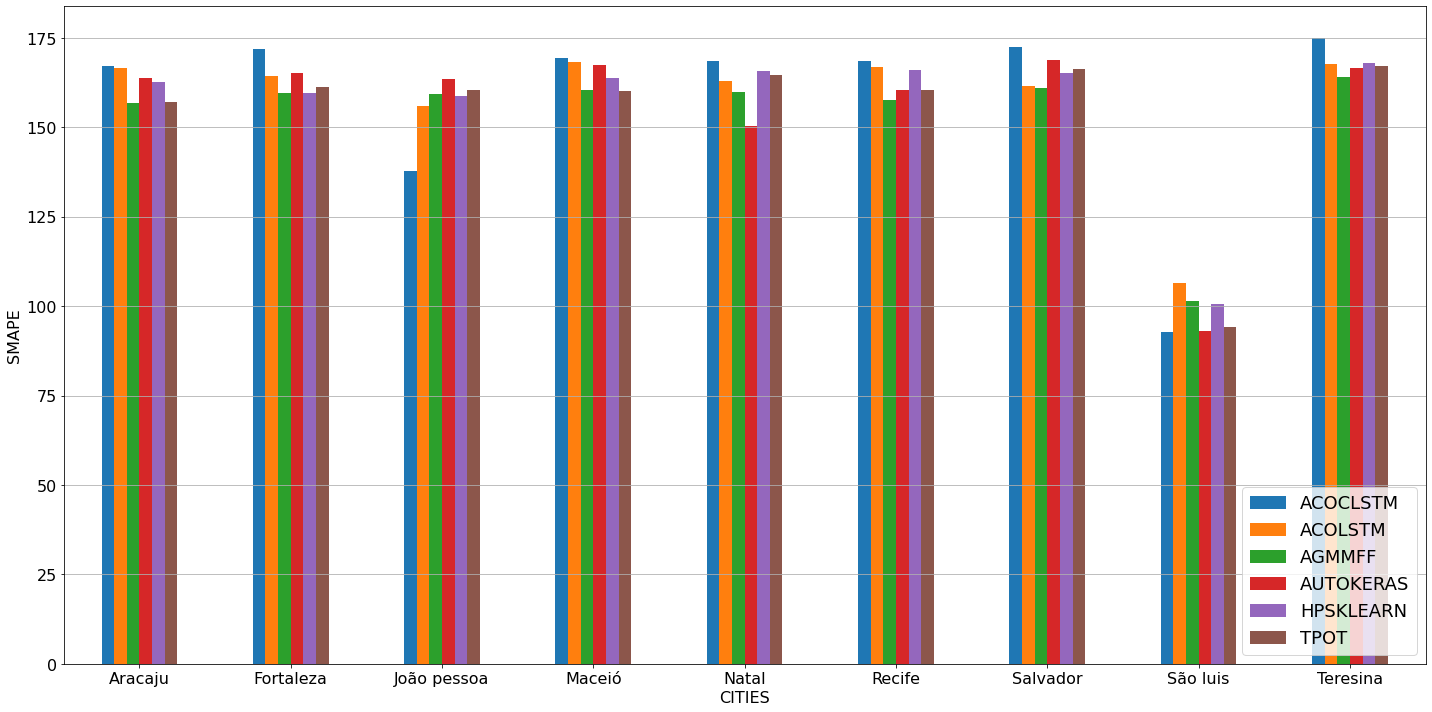

In [8]:
df_pivot = df_metrics[df_metrics["metric"]=="SMAPE"].pivot(index="city", columns="automl", values="value")
ax1 = df_pivot.sort_values(by=("city")).plot(fontsize=16,figsize=(20,10), kind="bar", rot=0)
ax1.set_xlabel('CITIES',fontdict={'fontsize':16})
ax1.set_ylabel('SMAPE',fontdict={'fontsize':16})
#ax1.set_yticks(list(range(0,10,200)))
ax1.grid(axis='y')
ax1.legend(loc=4,prop=dict(size=18))
plt.tight_layout()
plt.savefig('autoMLExperiencResults/barplot_smape.png', dpi=300)

## MAE Bar Plot

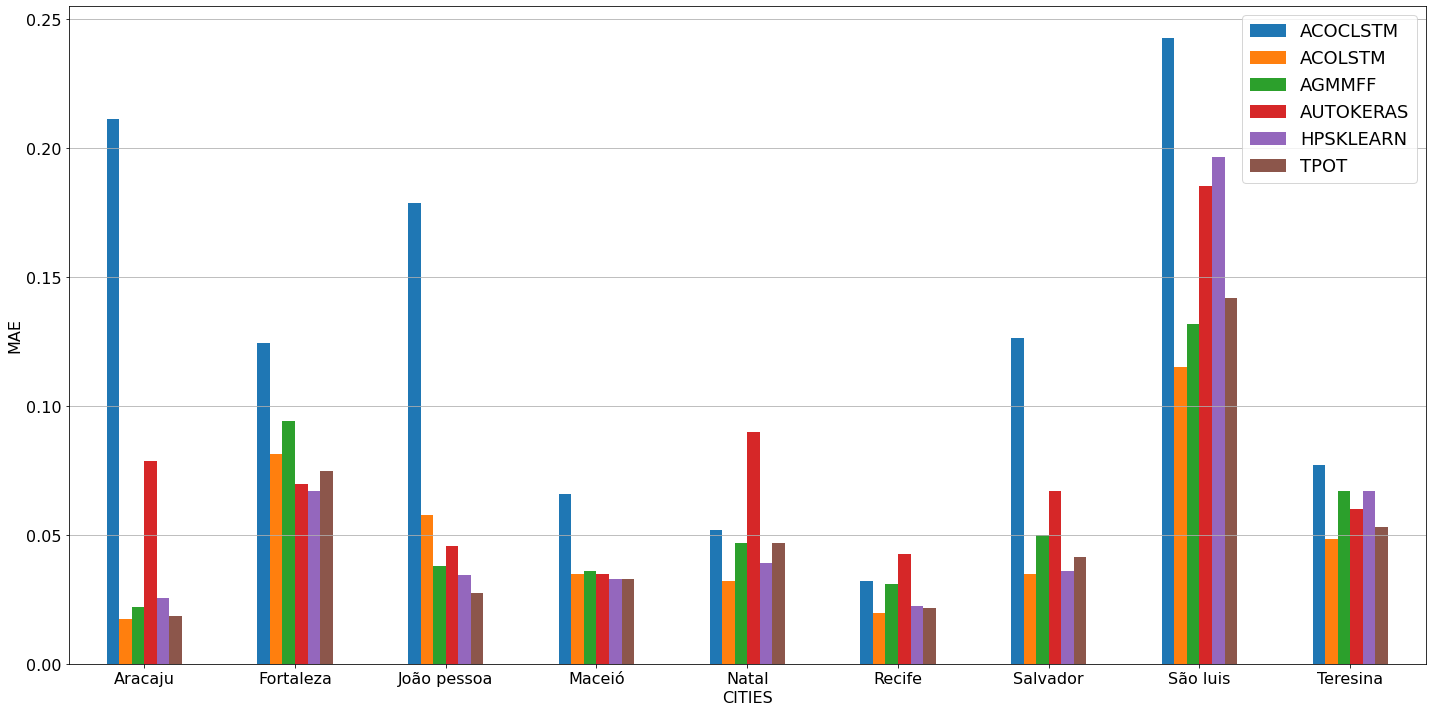

In [9]:
df_pivot = df_metrics[df_metrics["metric"]=="MAE"].pivot(index="city", columns="automl", values="value")
ax1 = df_pivot.sort_values(by=("city")).plot(fontsize=16,figsize=(20,10), kind="bar", rot=0)
ax1.set_xlabel('CITIES',fontdict={'fontsize':16})
ax1.set_ylabel('MAE',fontdict={'fontsize':16})
#ax1.set_yticks(list(range(0,10,200)))
ax1.grid(axis='y')
ax1.legend(loc=0,prop=dict(size=18))
plt.tight_layout()
plt.savefig('autoMLExperiencResults/barplot_mae.png', dpi=300)

## MSE Bar Plot

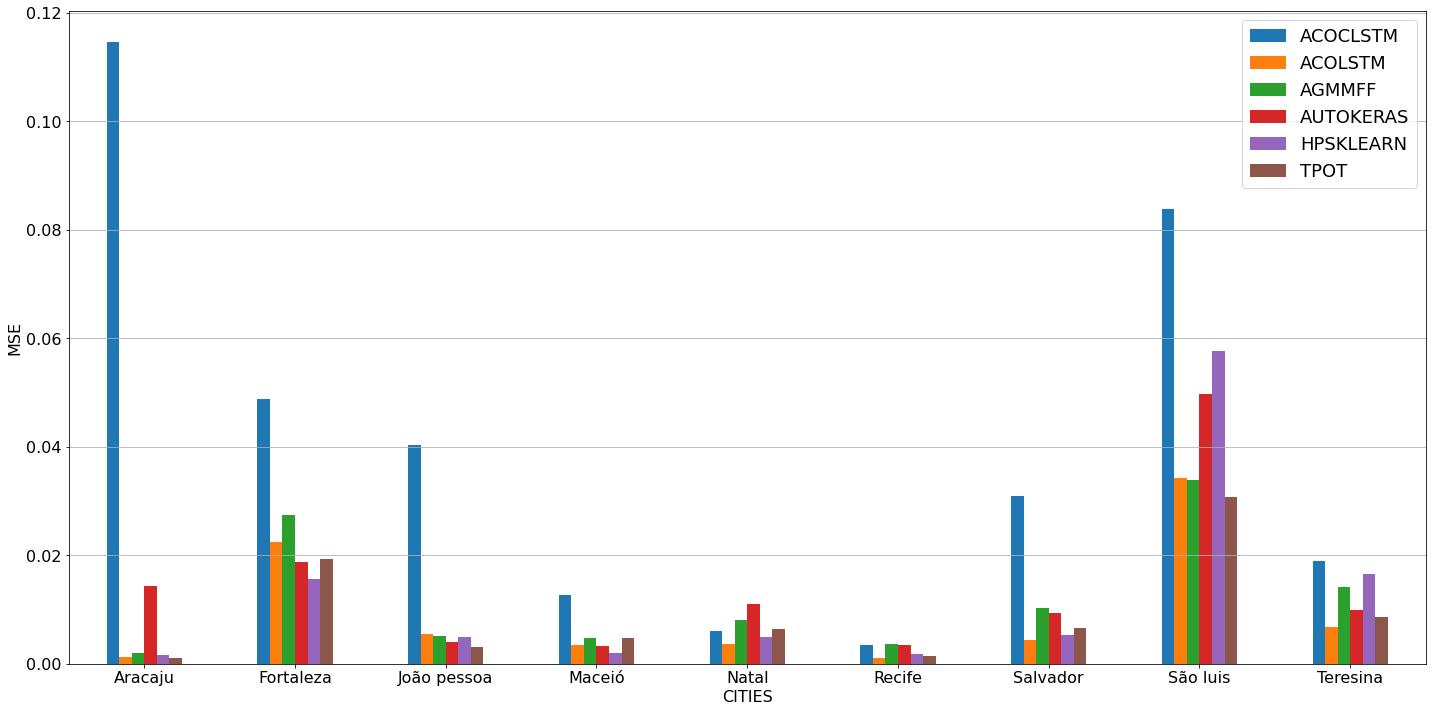

In [10]:
df_pivot = df_metrics[df_metrics["metric"]=="MSE"].pivot(index="city", columns="automl", values="value")
ax1 = df_pivot.sort_values(by=("city")).plot(fontsize=16,figsize=(20,10), kind="bar", rot=0)
ax1.set_xlabel('CITIES',fontdict={'fontsize':16})
ax1.set_ylabel('MSE',fontdict={'fontsize':16})
#ax1.set_yticks(list(range(0,10,200)))
ax1.grid(axis='y')
ax1.legend(loc=0,prop=dict(size=18))
plt.tight_layout()
plt.savefig('autoMLExperiencResults/barplot_mse.png', dpi=300)

# Simplifid BESS Power Flux 

But only for four bests ACOLSTM. Just to show in the results

In [91]:
cidades = ["aracaju"] #["joaopessoa", "maceio", "natal", "recife", "salvador", "saoluis", "teresina", "fortaleza"]

def getArraysDict(cidades):

    cities_arrays = {}

    for cidade in cidades:
        list_of_arrays_paths = ["./cidades/{0}/AutoMLResults/y_test".format(cidade),"./cidades/{0}/AutoMLResults/y_hat_ACOLSTM".format(cidade)]
        city_dict = {}
        for array_path in list_of_arrays_paths:
            print(array_path)
            city_dict[os.path.basename(array_path)] = np.loadtxt(array_path, delimiter=';')
        cities_arrays[cidade] = city_dict
        
    return cities_arrays

def loadData(csvFile, serie_column='radiacao_global_wpm2'):

    df_inmet = pd.read_csv(csvFile, sep=',', encoding = "ISO-8859-1")
    if df_inmet[serie_column].dtypes == "object":
        df_inmet[serie_column] = df_inmet[serie_column].apply(lambda x: float(str(x).replace(",","."))).fillna(0)
    
    return df_inmet

Dict_Arrays = getArraysDict(cidades)

./cidades/aracaju/AutoMLResults/y_test
./cidades/aracaju/AutoMLResults/y_hat_ACOLSTM
./cidades/joaopessoa/AutoMLResults/y_test
./cidades/joaopessoa/AutoMLResults/y_hat_ACOLSTM
./cidades/maceio/AutoMLResults/y_test
./cidades/maceio/AutoMLResults/y_hat_ACOLSTM
./cidades/natal/AutoMLResults/y_test
./cidades/natal/AutoMLResults/y_hat_ACOLSTM
./cidades/recife/AutoMLResults/y_test
./cidades/recife/AutoMLResults/y_hat_ACOLSTM
./cidades/salvador/AutoMLResults/y_test
./cidades/salvador/AutoMLResults/y_hat_ACOLSTM
./cidades/saoluis/AutoMLResults/y_test
./cidades/saoluis/AutoMLResults/y_hat_ACOLSTM
./cidades/teresina/AutoMLResults/y_test
./cidades/teresina/AutoMLResults/y_hat_ACOLSTM
./cidades/fortaleza/AutoMLResults/y_test
./cidades/fortaleza/AutoMLResults/y_hat_ACOLSTM


## Aracaju

<Figure size 864x432 with 0 Axes>

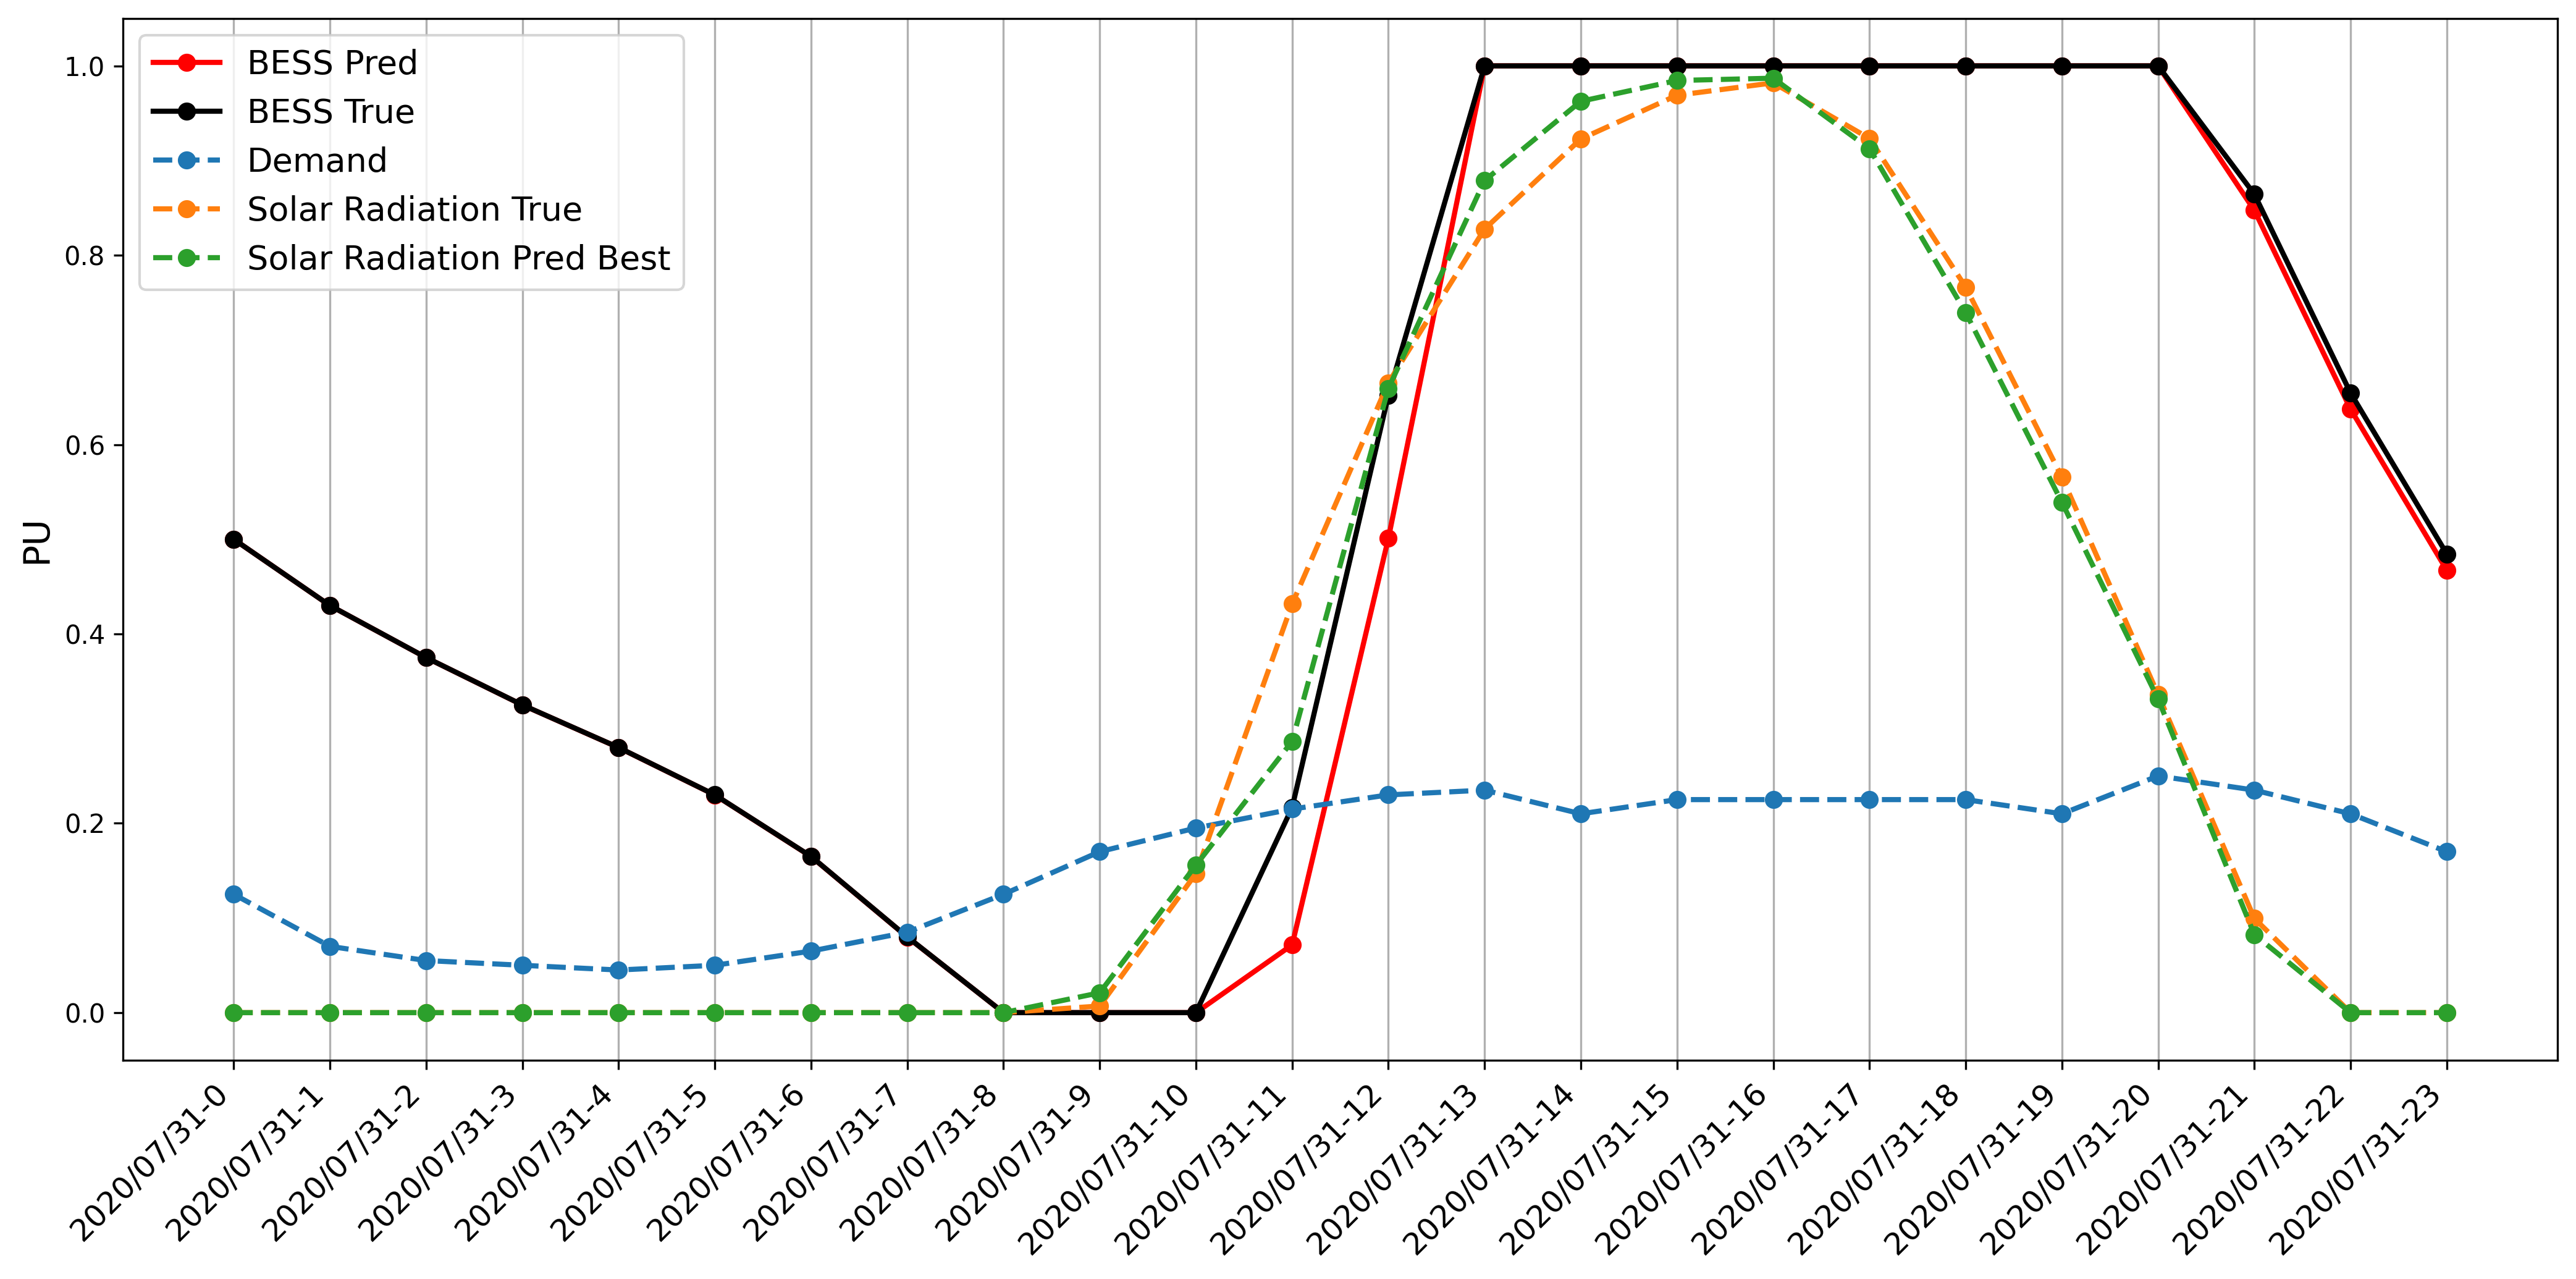

In [121]:
df_aracaju = loadData("./cidades/aracaju/historical_data_aracaju.csv")

simpleBess = SimpleBEES()
solarRadiation_True = Dict_Arrays["aracaju"]["y_test"][-24:]
solarRadiation_Pred = Dict_Arrays["aracaju"]["y_hat_ACOLSTM"][-24:]

solarFactor = 1
batery_charge_true, batery_charge_pred = simpleBess.simulate(solarRadiation_True, solarRadiation_Pred, DemandFactor=0.25, solarRadeFi=solarFactor)

plt.figure(figsize=(12,6))
ticks_X = df_aracaju.data.astype('str') + '-' + df_aracaju.hora.astype('str')
len_dt = len(solarRadiation_True)
ticks_X = ticks_X[-len_dt:].values

_, ax = plt.subplots(1,1, figsize=(14,7), dpi=300)

ax.plot(ticks_X, batery_charge_pred, 'r-o',  label = "BESS Pred", linewidth=2.0)
ax.plot(ticks_X, batery_charge_true, 'k-o', label = "BESS True", linewidth=2.0)
ax.plot(ticks_X, simpleBess._DemandData, '--o', label = "Demand", linewidth=2.0)
ax.plot(ticks_X, solarRadiation_True*solarFactor, '--o', label="Solar Radiation True", linewidth=2.0)
ax.plot(ticks_X, solarRadiation_Pred*solarFactor, '--o', label="Solar Radiation Pred Best", linewidth=2.0)
ax.legend(fontsize=13)

plt.xticks(ticks_X, rotation=45, ha='right', fontsize=12)
ax.grid(axis='x')
ax.legend(fontsize=13)
ax.set_ylabel('PU', fontsize=14)
plt.tight_layout()
plt.savefig('autoMLExperiencResults/aracaju_bess.png', dpi=300)

In [122]:
batery_charge_true

array([0.5       , 0.43      , 0.375     , 0.325     , 0.28      ,
       0.23      , 0.165     , 0.08      , 0.        , 0.        ,
       0.        , 0.21669434, 0.6519695 , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.86445508, 0.65445508, 0.48445508])